In [1]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
affair = pd.read_csv('affairs.csv')

In [3]:
affair.head(10)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3
5,0,female,32.0,1.50,no,2,17,5,5
6,0,female,22.0,0.75,no,2,12,1,3
7,0,male,57.0,15.00,yes,2,14,4,4
8,0,female,32.0,15.00,yes,4,16,1,2
9,0,male,22.0,1.50,no,4,14,4,5


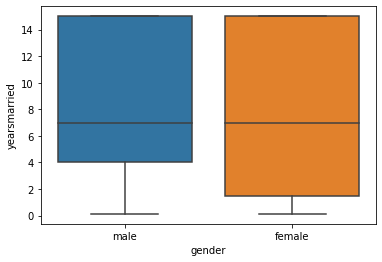

In [4]:
import seaborn as sns
sns.boxplot(x="gender",y="yearsmarried",data=affair)

In [5]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
affair['gender']= le.fit_transform(affair['gender'].astype('str'))
affair['children']= le.fit_transform(affair['children'].astype('str'))

In [6]:
affair.head(10)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,1,37.0,10.00,0,3,18,7,4
1,0,0,27.0,4.00,0,4,14,6,4
2,0,0,32.0,15.00,1,1,12,1,4
3,0,1,57.0,15.00,1,5,18,6,5
4,0,1,22.0,0.75,0,2,17,6,3
5,0,0,32.0,1.50,0,2,17,5,5
6,0,0,22.0,0.75,0,2,12,1,3
7,0,1,57.0,15.00,1,2,14,4,4
8,0,0,32.0,15.00,1,4,16,1,2
9,0,1,22.0,1.50,0,4,14,4,5


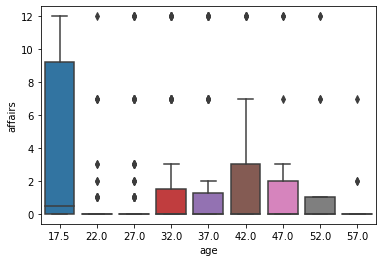

In [7]:
import seaborn as sns
sns.boxplot(x="age",y="affairs",data=affair)

In [8]:
affair.apply(lambda x:x.mean()) 
affair.mean()

affairs           1.455907
gender            0.475874
age              32.487521
yearsmarried      8.177696
children          0.715474
religiousness     3.116473
education        16.166389
occupation        4.194676
rating            3.931780
dtype: float64

In [9]:
affair.affairs.value_counts()

0     451
7      42
12     38
1      34
3      19
2      17
Name: affairs, dtype: int64

In [10]:
affair.gender.value_counts()

0    315
1    286
Name: gender, dtype: int64

In [11]:
affair.age.value_counts()

27.0    153
22.0    117
32.0    115
37.0     88
42.0     56
47.0     23
57.0     22
52.0     21
17.5      6
Name: age, dtype: int64

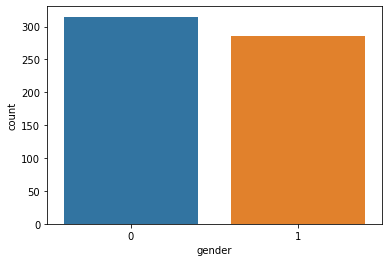

In [12]:
sns.countplot(x='gender',data= affair)

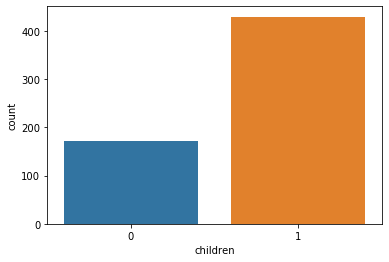

In [13]:
sns.countplot(x='children', data= affair)

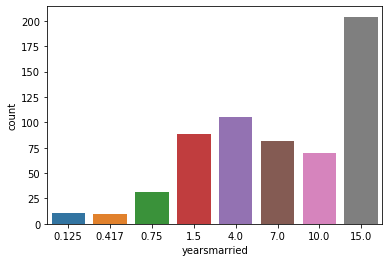

In [14]:
sns.countplot(x='yearsmarried', data= affair)

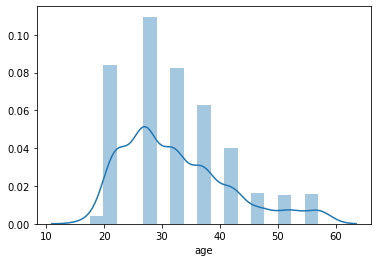

In [15]:
sns.distplot(affair['age'])

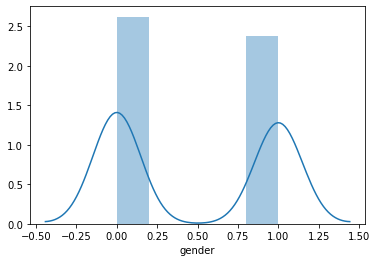

In [16]:
sns.distplot(affair['gender'])

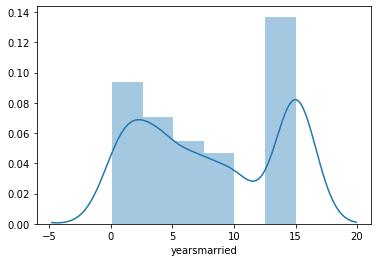

In [17]:
sns.distplot(affair['yearsmarried'])

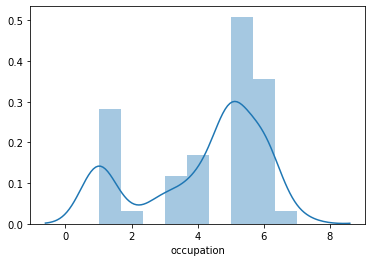

In [18]:
sns.distplot(affair['occupation'])

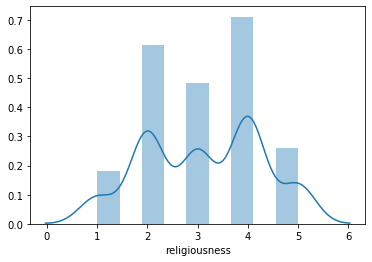

In [19]:
sns.distplot(affair['religiousness'])

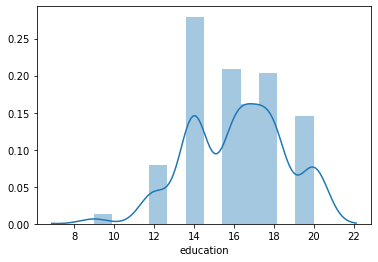

In [20]:
sns.distplot(affair['education'])

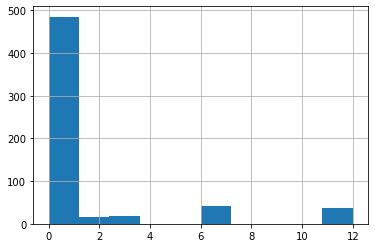

In [21]:
affair['affairs'].hist()

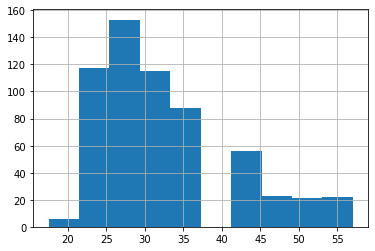

In [22]:
affair['age'].hist()

In [23]:
affair

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,1,37.0,10.00,0,3,18,7,4
1,0,0,27.0,4.00,0,4,14,6,4
2,0,0,32.0,15.00,1,1,12,1,4
3,0,1,57.0,15.00,1,5,18,6,5
4,0,1,22.0,0.75,0,2,17,6,3
...,...,...,...,...,...,...,...,...,...
596,1,1,22.0,1.50,1,1,12,2,5
597,7,0,32.0,10.00,1,2,18,5,4
598,2,1,32.0,10.00,1,2,17,6,5
599,2,1,22.0,7.00,1,3,18,6,2


In [24]:
affair.head(5)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,1,37.0,10.00,0,3,18,7,4
1,0,0,27.0,4.00,0,4,14,6,4
2,0,0,32.0,15.00,1,1,12,1,4
3,0,1,57.0,15.00,1,5,18,6,5
4,0,1,22.0,0.75,0,2,17,6,3


In [25]:
import statsmodels.formula.api as sm
logit_model = sm.logit('gender~affairs+age+yearsmarried+children+religiousness+rating',data = affair).fit()

Optimization terminated successfully.
         Current function value: 0.650896
         Iterations 5


In [26]:
#logit_model.summary()
y_pred = logit_model.predict(affair)

In [27]:
affair["pred_prob"] = y_pred

In [28]:
affair["Att_val"] = np.zeros(601)

In [29]:
affair.loc[y_pred>0.5,"Att_val"] = 1

In [30]:
affair

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,pred_prob,Att_val
0,0,1,37.0,10.00,0,3,18,7,4,0.443458,0.0
1,0,0,27.0,4.00,0,4,14,6,4,0.397250,0.0
2,0,0,32.0,15.00,1,1,12,1,4,0.270259,0.0
3,0,1,57.0,15.00,1,5,18,6,5,0.830793,1.0
4,0,1,22.0,0.75,0,2,17,6,3,0.380909,0.0
...,...,...,...,...,...,...,...,...,...,...,...
596,1,1,22.0,1.50,1,1,12,2,5,0.489387,0.0
597,7,0,32.0,10.00,1,2,18,5,4,0.464668,0.0
598,2,1,32.0,10.00,1,2,17,6,5,0.447559,0.0
599,2,1,22.0,7.00,1,3,18,6,2,0.281049,0.0


In [31]:
confusion_matrix = pd.crosstab(affair['gender'],affair.Att_val)


In [32]:
confusion_matrix

Att_val,0.0,1.0
gender,,
0,224,91
1,139,147


In [33]:
accuracy = (224+147)/(601) 
accuracy# ROC curve 



0.6173044925124792

In [34]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(affair.gender,affair.Att_val)

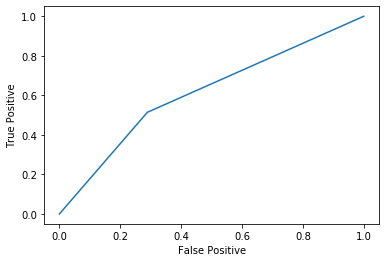

In [35]:
plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 
roc_auc = metrics.auc(fpr, tpr) #

In [36]:
roc_auc

0.61254856254856249